In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/c1/n8_mx1f974j8rl93qwds830r0000gn/T/ipykernel_4930/82512272.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   adult    budget  runtime  release_month  release_year  Action  Adventure  \
0      0 -0.026278    123.0              3          2019       1          0   
1      0  4.387824    133.0             12          2016       1          1   
2      0  1.083553    116.0              5          2017       1          0   
3      0 -0.026278    117.0              1          2012       1          1   
4      0  3.832908    147.0              7          2018       1          1   

   Animation  Comedy  Crime  ...  Horror  Music  Mystery  Romance  \
0          0       0      0  ...       0      0        0        0   
1          0       0      0  ...       0      0        0        0   
2          0       1      1  ...       0      0        0        0   
3          0       0      0  ...       0      0        0        0   
4          0       0      0  ...       0      0        0        0   

   Science Fiction  TV Movie  Thriller  War  zh  Released  
0                0         0         1    0   0   

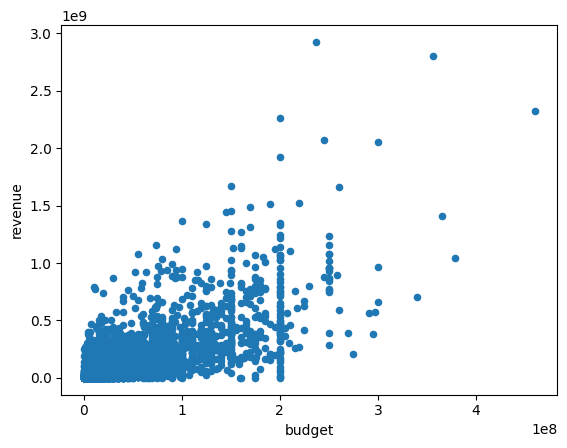

In [17]:
# import and preprocess
df = pd.read_csv('../data/tmdb/processed_tmdb_data.csv')

# the features we are normaliziing are the budget and the revenue
normalize_features = ['budget', 'revenue']
scaler = StandardScaler()

# Not Normalized Budget data put in a scatter plot --> Could be useful for the presentation
df.plot.scatter(x='budget', y='revenue')

# normalize the budget and the revenue
df[normalize_features] = scaler.fit_transform(df[normalize_features]) #scale budget and revenue

# for initial, preliminary baseline linear regression drop the countries and languages
df = df.drop(columns=df.columns[24:249]) #countries and languages are dropped
X = df.drop(columns=['revenue','roi'])#including budget in the predictors because budget is determined in pre-production
y = df['revenue']

print(X.head())

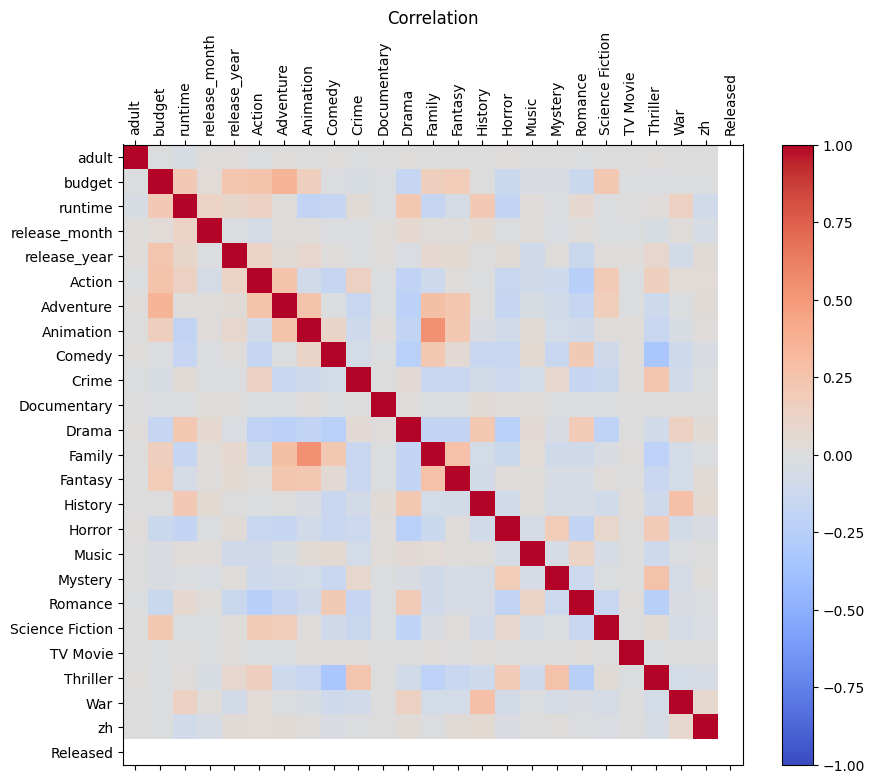

In [19]:
def correlationHeatmap(X):
    corr_matrix = X.corr()
    img = plt.matshow(
        corr_matrix, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1 
    )
    img.figure.set_size_inches( 10, 8 )
    img.axes.set_xticks(np.arange(corr_matrix.shape[1]), labels= list(corr_matrix.columns), rotation='vertical')
    img.axes.set_yticks(np.arange(corr_matrix.shape[1]), labels=list(corr_matrix.index), rotation='horizontal')
    img.figure.colorbar(img)
    img.axes.set_title("Correlation")
    plt.show()
correlationHeatmap(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regression_model = LinearRegression().fit(X_train, y_train)

print(f'R^2 score for training set: {regression_model.score(X_train, y_train)}')
print(f'R^2 score for test set: {regression_model.score(X_test, y_test)}')

R^2 score for training set: 0.5598604352030323
R^2 score for test set: 0.5578986965260837


In [28]:
def residual(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # output: a list of residuals corresponding to each X in the input
    pred = regression_model.predict(X_test)
    res = (y_test - pred)
    return res


def plotResidualHistogram(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # Compute the residuals using the previous residual function
    # Loop through the attributes and plot a histogram for the residuals
    # Output: None, simply plot the histogram
    # ref - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    plt.hist(residual(regression_model, X_test, y_test), bins=100)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

def plotResidualsVsAttributes(regression_model, X_test, y_test, attributes):
    # inputs: the regression model, test X and test y from the previous question, and a list of columns to plot residuals against
    # Compute the residuals using the previous function
    # Loop through the attributes and plot a scatter plot for each column's data and the residuals
    # Output: None, simply plot the graphs
    residuals = residual(regression_model, X_test, y_test)
    for attribute in attributes:
        plt.figure()
        plt.scatter(X_test[attribute], residuals)
        plt.title(f"Residuals vs {attribute}")
        plt.xlabel(attribute)
        plt.ylabel("Residual")
        plt.show()

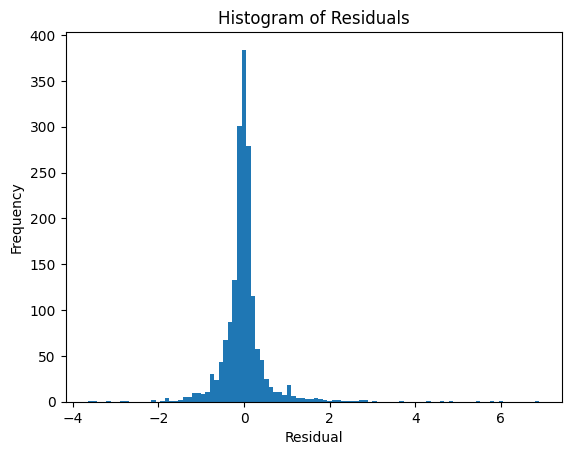

In [23]:
plotResidualHistogram(regression_model, X_test, y_test)

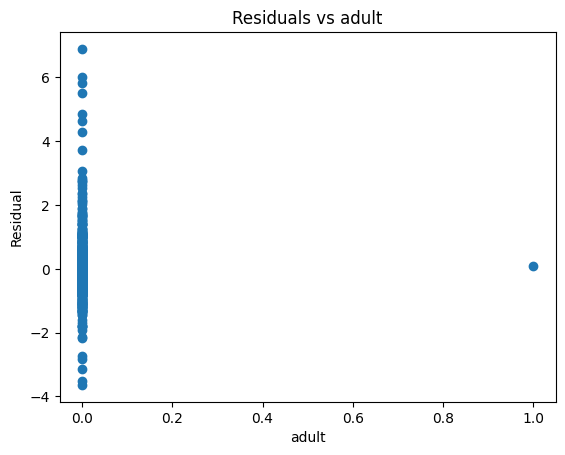

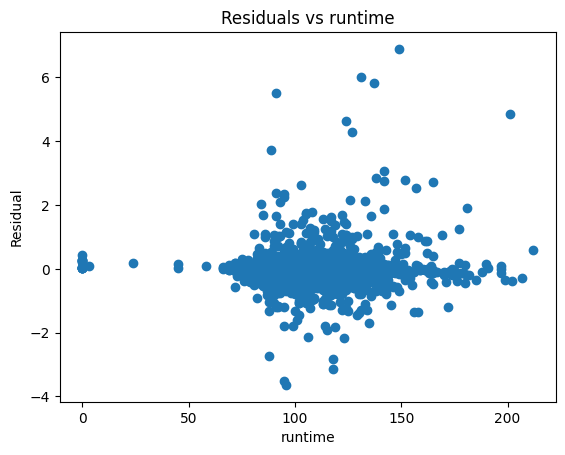

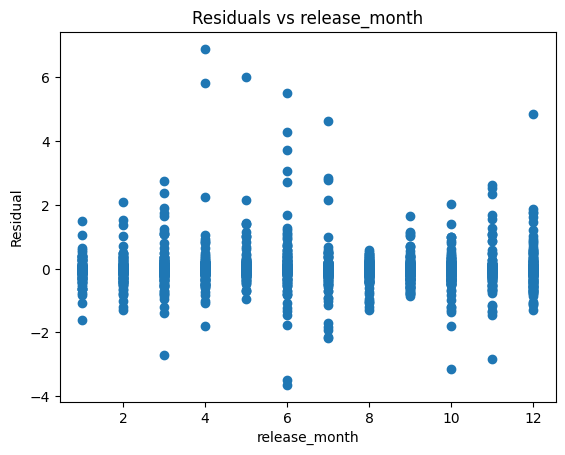

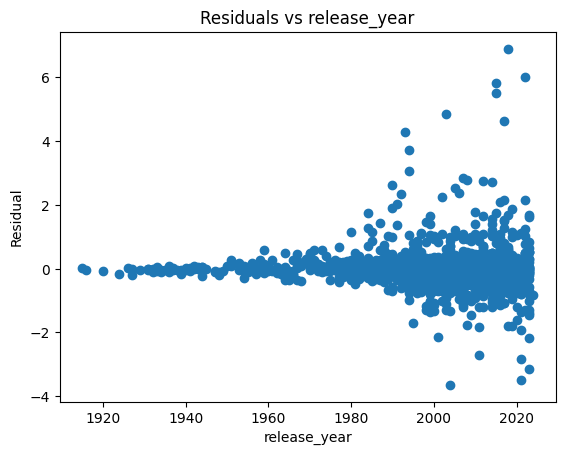

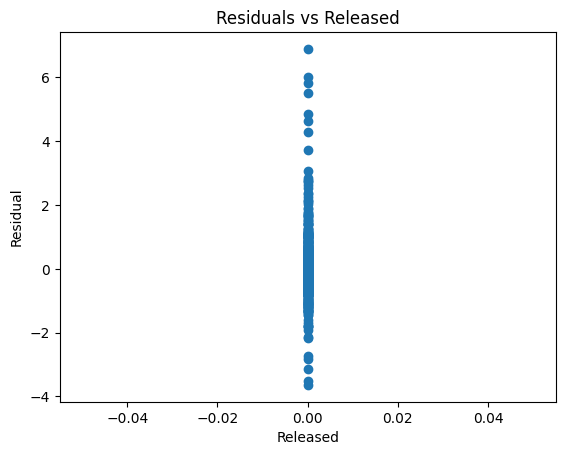

In [25]:
attribute_list = ['adult', 'runtime', 'release_month', 'release_year', 'Released']

plotResidualsVsAttributes(regression_model, X_test, y_test, attribute_list)

In [26]:
from sklearn.kernel_ridge import KernelRidge
np.random.seed(42)

kernel_regression_model = KernelRidge(alpha=0.5, kernel='rbf')
kernel_regression_model.fit(X_train, y_train)

print(f'R^2 score for Kernel Ridge Regression training set: {kernel_regression_model.score(X_train, y_train)}')
print(f'R^2 score for Kernel Ridge Regression test set: {kernel_regression_model.score(X_test, y_test)}')

R^2 score for Kernel Ridge Regression training set: 0.7987853464754577
R^2 score for Kernel Ridge Regression test set: 0.5150246968146367
